# The Best Neighboorhood in Pittsburgh

Our definition of the "Best Neighborhood" is the one that is the cleanest, and the most fun. To determine this, we used data relative to the square mileage of each neighborhood, and will eventually create our final metric out of the combination of smart trash containers per square mile and playgrounds per square mile.

## Imports

In [64]:
# Imports
import pandas as pd
import numpy as np
import ssl
import matplotlib.pyplot as plt

%matplotlib inline

## Data Cleaning and Graphs!

Data was taken from 3 separate datasets, so we took the required data out of each set and merged it into a new one that was much easier to work with.

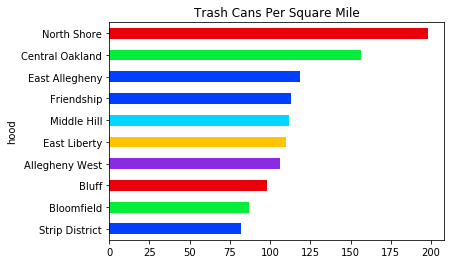

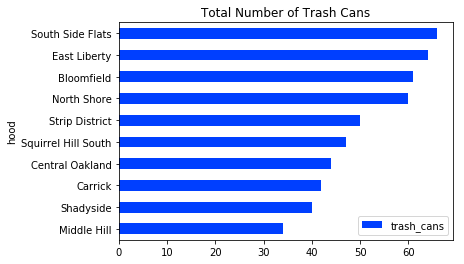

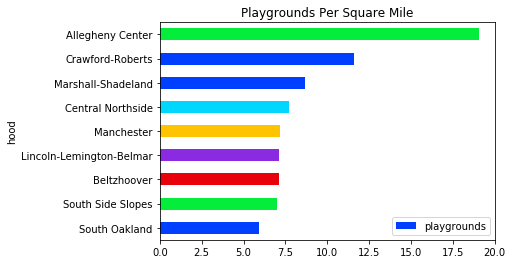

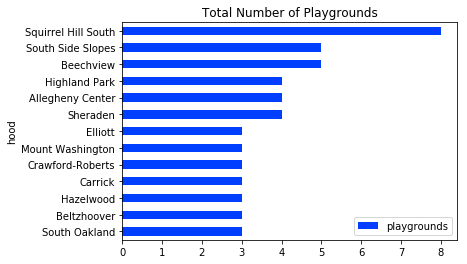

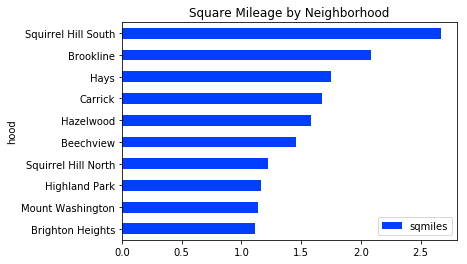

In [91]:
# Loading Data into Jupyterhub
pgh_trash_data = pd.read_csv("https://data.wprdc.org/datastore/dump/75b83ac9-8069-4cf1-bcc3-b9e6b04487d9")
pgh_neighborhood_data = pd.read_csv("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.csv")
pgh_playground_data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")

# Organize Data by neighborhood
trash_by_neighborhood = pgh_trash_data['neighborhood'].value_counts()
playgrounds_by_neighborhood = pgh_playground_data['neighborhood'].value_counts()
pgh_sqmiles = pgh_neighborhood_data['sqmiles']
pgh_hoods = pgh_neighborhood_data['hood']

# Convert Series to Dataframe
trash_by_neighborhood_frame = trash_by_neighborhood.to_frame()
playgrounds_by_neighborhood_frame = playgrounds_by_neighborhood.to_frame()
pgh_sqmiles_frame = pgh_sqmiles.to_frame()
pgh_hoods_frame = pgh_hoods.to_frame()

# Rename columns to allow for merging
trash_by_neighborhood_frame.reset_index(inplace=True)
trash_by_neighborhood_frame.rename(columns = {'index':'hood', 'neighborhood':'trash_cans'}, inplace=True)
playgrounds_by_neighborhood_frame.reset_index(inplace=True)
playgrounds_by_neighborhood_frame.rename(columns = {'index':'hood', 'neighborhood':'playgrounds'}, inplace=True)

# Merge data togehter
sqmiles_by_neighborhood = pgh_hoods_frame.join(pgh_sqmiles_frame)
trash_and_sqmiles_by_hood = pd.merge(sqmiles_by_neighborhood, trash_by_neighborhood_frame)
playgrounds_and_sqmiles_by_hood = pd.merge(sqmiles_by_neighborhood, playgrounds_by_neighborhood_frame)

# Calculate the ratio of trash cans to square miles
data = trash_and_sqmiles_by_hood['trash_cans'] / trash_and_sqmiles_by_hood['sqmiles']
data_frame = data.to_frame()
data_frame.columns = ['ratio']
overall_data = trash_and_sqmiles_by_hood.join(data_frame)
overall_data.rename(columns = {'Unnamed':'ratio'}, inplace=True)
overall_data = overall_data.set_index('hood')

# Calculate the ratio of playgrounds to square miles
data2 = playgrounds_and_sqmiles_by_hood['playgrounds'] / playgrounds_and_sqmiles_by_hood['sqmiles']
data2_frame = data2.to_frame()
data2_frame.columns = ['ratio']
overall_data2 = playgrounds_and_sqmiles_by_hood.join(data2_frame)
overall_data2.rename(columns = {'Unnamed':'ratio'}, inplace=True)
overall_data2 = overall_data2.set_index('hood')

# Filter
    # Filtering ratios
trimmed_data = overall_data[overall_data.ratio >= 82]
trimmed_data = trimmed_data.sort_values(by='ratio')

    # Filtering ratios
trimmed_data2 = overall_data2[overall_data2.ratio >= 5.8]
trimmed_data2 = trimmed_data2.sort_values(by='ratio')

    # Filtering trash can totals
trimmed_trash = trash_by_neighborhood_frame[trash_by_neighborhood_frame.trash_cans >= 34]
trimmed_trash = trimmed_trash.sort_values(by='trash_cans')
trimmed_trash = trimmed_trash.set_index('hood')

    # Filtering playground totals
trimmed_playgrounds = playgrounds_by_neighborhood_frame[playgrounds_by_neighborhood_frame.playgrounds >= 3]
trimmed_playgrounds = trimmed_playgrounds.sort_values(by='playgrounds')
trimmed_playgrounds = trimmed_playgrounds.set_index('hood')

    # Filtering square milage
trimmed_sqmiles = sqmiles_by_neighborhood[sqmiles_by_neighborhood.sqmiles >= 1.1]
trimmed_sqmiles = trimmed_sqmiles.sort_values(by='sqmiles')
trimmed_sqmiles = trimmed_sqmiles.set_index('hood')

# Print data
plt.style.use('seaborn-bright')
    # Trashcan Ratio
trimmed_data['ratio'].plot.barh(title='Trash Cans Per Square Mile')
    # List of Trash Cans and Playgrounds
trimmed_trash.plot.barh(title='Total Number of Trash Cans')
trimmed_playgrounds.plot.barh(title='Total Number of Playgrounds')
    # Playground Ratio
trimmed_data2['ratio'].plot.barh(title='Playgrounds Per Square Mile')
    #List of Playgrounds
trimmed_playgrounds.plot.barh(title='Total Number of Playgrounds')
    # List of Square Miles
trimmed_sqmiles.plot.barh(title='Square Mileage by Neighborhood')